# Introduction to Regression: Line Fitting

In this introduction, we will develop linear regression from basic principles.  Other tutorials will forgo the theory and focus on existing python libraries that are commonly used for building regression models.


In [1]:
# All good python projects begin with specifying which modules to load

import pandas as pd  # Pandas is a package which creates data frames
import numpy as np # Numpy is the package which creates/manages/operates on numerical data
import matplotlib.pyplot as plt # Matplotlib is the plotting library

## The Data

Every project begins with the data.  We will be using example data that _Fedor Karmanov_ has created based on some published literature.  Visit Fedor's github repo to learn more (https://github.com/fed-ka/springboard)

//=-=-=-=-=-=-=-=-=-=-=-=-=-=

Dataset:  lsd.dat
Source: Wagner, Agahajanian, and Bing (1968). Correlation of Performance
Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in
Human Subjects. Clinical Pharmacology and Therapeutics, Vol.9 pp635-638.

Description: Group of volunteers was given LSD, their mean scores on
math exam and tissue concentrations of LSD were obtained at n=7 time points.

Variables/Columns

Tissue Concentration    1-4 <br>
Math Score             8-12

//=-=-=-=-=-=-=-=-=-=-=-=-=-=



In [2]:
# Pull the data directly from github
lsd = 'https://raw.githubusercontent.com/fed-ka/springboard/master/5.%20Linear%20Regressions%20in%20Python/lsd.csv'
data = pd.read_csv(lsd)

# head() gives a snapshot of the data.  Jupyterhub is great a rendering tables.
data.head()

,Tissue Concentration,Test Score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


In [3]:
# describe() provides more summary information from the data (also in a nice rendered table)
data.describe()

,Tissue Concentration,Test Score
count,7.000000,7.000000
mean,4.332857,50.087143
std,1.935413,18.610854
min,1.170000,29.970000
25%,3.115000,35.195000
50%,4.690000,45.650000
75%,5.915000,62.835000
max,6.410000,78.930000


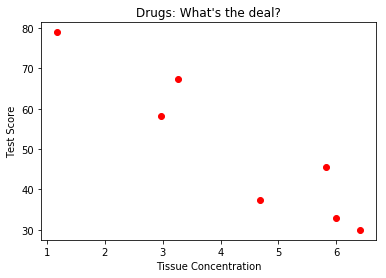

In [4]:
# plt.scatter can show us the data
plt.scatter(data['Tissue Concentration'], data['Test Score'],color='r')
plt.title('Drugs: What\'s the deal?')
plt.xlabel('Tissue Concentration')
plt.ylabel('Test Score')
plt.show()

# Model buiding

When building models, there are any number of ways to store/represent the data.  

You can always use the native data table and refer directly to the columns, but I'm too lazy to keep typing 'Tissue Concentration' and 'Test Score', so I'm going to create new datatables.

model: Dict <br>
model['m']: Slope of the line <br>
model['b']: Y Intercept

modelData: Dataframe <br>
modelData['x']: Independent variable <br>
modelData['y']: Dependent variable <br>
modelData['y\_']: Estimated dependent variable based on model



In [5]:
model = dict()
model['m'] = (80-30)/(1-6.5)
model['b'] = 85


model


{'b': 85, 'm': -9.090909090909092}

In [6]:
modelData = pd.DataFrame({'x': data['Tissue Concentration'],'y': data['Test Score']})
modelData['y_'] = model['m'] * modelData['x']  +  model['b']

modelData

,x,y,y_
0,1.17,78.93,74.363636
1,2.97,58.20,58.000000
2,3.26,67.47,55.363636
3,4.69,37.47,42.363636
4,5.83,45.65,32.000000
5,6.00,32.92,30.454545
6,6.41,29.97,26.727273


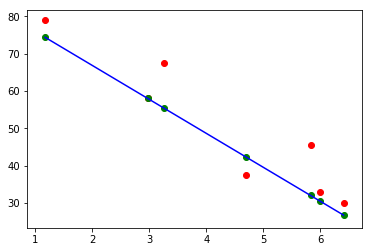

In [7]:
# Let's see how we did
plt.scatter(modelData['x'],modelData['y'],color='r')
plt.scatter(modelData['x'],modelData['y_'],color='g')
plt.plot(modelData['x'],modelData['y_'],color='b')
plt.show()

# Model Evaulation

We need a metric to determine how good the model is.  Thoughts?

In [8]:
modelData['delta'] = modelData['y'] - modelData['y_']
modelData

,x,y,y_,delta
0,1.17,78.93,74.363636,4.566364
1,2.97,58.20,58.000000,0.200000
2,3.26,67.47,55.363636,12.106364
3,4.69,37.47,42.363636,-4.893636
4,5.83,45.65,32.000000,13.650000
5,6.00,32.92,30.454545,2.465455
6,6.41,29.97,26.727273,3.242727


In [9]:
modelData['squared'] = modelData['delta']*modelData['delta']
modelData

,x,y,y_,delta,squared
0,1.17,78.93,74.363636,4.566364,20.851677
1,2.97,58.20,58.000000,0.200000,0.040000
2,3.26,67.47,55.363636,12.106364,146.564040
3,4.69,37.47,42.363636,-4.893636,23.947677
4,5.83,45.65,32.000000,13.650000,186.322500
5,6.00,32.92,30.454545,2.465455,6.078466
6,6.41,29.97,26.727273,3.242727,10.515280


In [10]:
sse = sum(modelData['squared'])/modelData['squared'].count()
sse

56.331377213695454

<font color='red'>
# Ok, Now go back and try different values for m and b.
# Can you do better?